In this notebook I investigate the offset between the monochromator request velocity and the measured velocity. I show how to search the catalog, and do somthing with the output


In [16]:
import databroker
# Connect to the sissy2 catalog
db = databroker.catalog["sissy2"]

run = db[-2]

In [17]:
data=run.primary.read()

request_vel = run.primary.metadata['start']['plan_args']['vel']


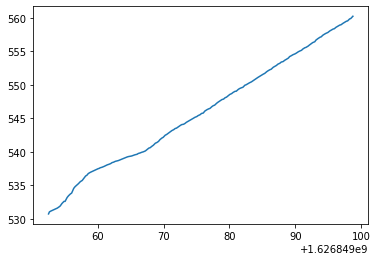

In [18]:
import matplotlib.pyplot as plt

plt.plot(data.ue48_pgm_readback.time,data.ue48_pgm_readback) # Note that this looses lots of the context given in the xarray


In [36]:
import numpy as np
t=data.ue48_pgm_readback.time - data.ue48_pgm_readback.time[0]
x=data.ue48_pgm_readback
m,b = np.polyfit(t,x, 1) 


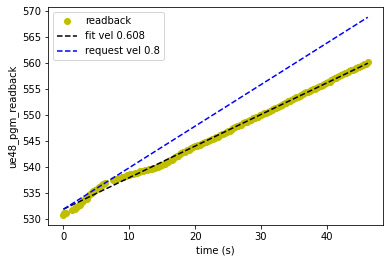

In [46]:

fig, ax = plt.subplots()
ax.plot(t, x, 'yo', label='readback')
ax.plot(t, m*t+b, '--k',label='fit vel '+ str(np.round(m,3))) 
ax.plot(t, request_vel*t+b, '--b',label='request vel '+ str(request_vel)) 

plt.xlabel('time (s)')
plt.ylabel(run.primary.metadata['start']['motors'][0])
plt.legend()

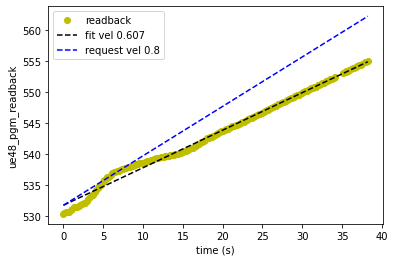

In [58]:
run = db[-10]
data=run.primary.read()

request_vel = run.primary.metadata['start']['plan_args']['vel']
t=data.ue48_pgm_readback.time - data.ue48_pgm_readback.time[0]
x=data.ue48_pgm_readback
m,b = np.polyfit(t,x, 1) 

fig, ax = plt.subplots()
ax.plot(t, x, 'yo', label='readback')
ax.plot(t, m*t+b, '--k',label='fit vel '+ str(np.round(m,3))) 
ax.plot(t, request_vel*t+b, '--b',label='request vel '+ str(request_vel)) 

plt.xlabel('time (s)')
plt.ylabel(run.primary.metadata['start']['motors'][0])
plt.legend()

In [100]:
results = db.search({"plan_name":"flycount","motors":"ue48_pgm_readback" })
len(results)

vel_reqs = []
vel_fit = []
for uid, run in results.items():

    if run.metadata['stop'] != None:
        if(run.metadata['stop']['exit_status'] == 'success'):
            if 'vel' in run.primary.metadata['start']['plan_args']:

                vel_reqs.append(run.primary.metadata['start']['plan_args']['vel'])
                data=run.primary.read()

                request_vel = run.primary.metadata['start']['plan_args']['vel']
                t=data.ue48_pgm_readback.time - data.ue48_pgm_readback.time[0]
                x=data.ue48_pgm_readback
                m,b = np.polyfit(t,x, 1) 
                
                vel_fit.append(m)


ax.plot(t, m*t+b, '--k',label='fit vel '+ str(np.round(m,3))) 
ax.plot(t, request_vel*t+b, '--b',label='request vel '+ str(request_vel)) 

plt.xlabel('time (s)')
plt.ylabel(run.primary.metadata['start']['motors'][0])
plt.legend()

m,b = np.polyfit(vel_reqs,vel_fit, 1)                 
print("the average ratio is: " + str(np.round(m,3)))                

the average ratio is: 0.736
